# Enrichment/depletion of each guide on a singular gene

In [1]:
""" Imports """
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO

In [27]:
""" User Inputs """
log2_fc_csv = '/Users/evelynfaust/Desktop/ORNL/CRISPRi_data_analysis/test_downstream_data/example_along_gene.csv' ## See TODO below
min_log2_fc = 1.5 # this is for display, both negative and positive are considered
max_log2_fc = 5 # this is for display, both negative and positive are considered

<div class="alert alert-block alert-warning">
<b>TODO:</b> 

- As it stands, the input dataframe has the gene targetted by individual guides (1 guide per row), the log2FC, the gene length, the start and end of the guide's range (genomic positions, from Maggie's set up), and the start and end of the gene's position in the genome. This standard input format could be improved
- See my code at the bottom which I used to extract some of this information. 
- Note: this data is not real, I made some Log2FC values negative/positive to see if I could capture both in the same graph. More likely, you'll just have one (most guides will have either + log2FC or - log2FC). The position of the zero line can be easily changed.
</div>

In [66]:
""" Data Read-in """
# Load the log2 fold change data
df = pd.read_csv(log2_fc_csv)


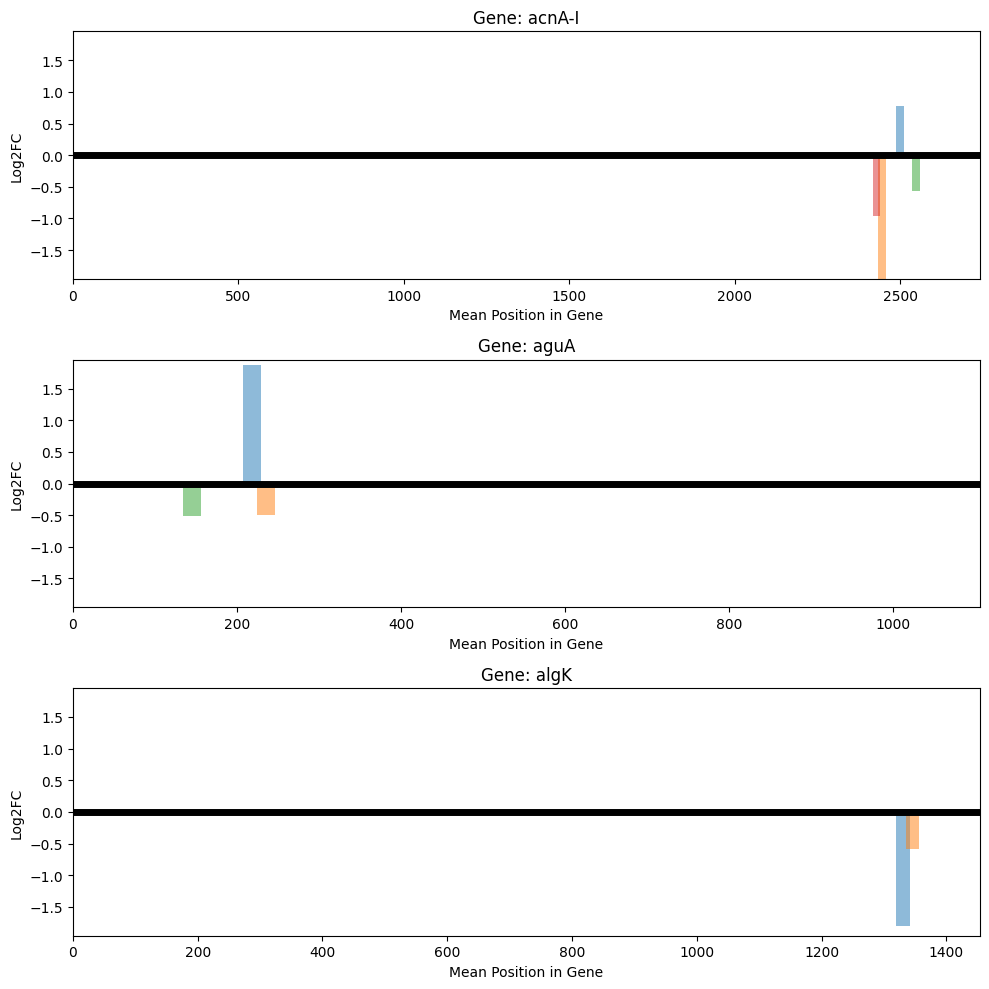

In [67]:
""" Plotting """

# Create a figure with subplots for each gene
fig, axs = plt.subplots(len(df['gene'].unique()), 1, figsize=(10, 10))

# Iterate over each unique gene in the dataframe
for i, gene in enumerate(df['gene'].unique()):
    rows = df[df['gene'] == gene]

    # Use the correct subplot's axis for the current gene iteration
    ax = axs[i]

    # Set the title for the subplot
    ax.set_title(f'Gene: {gene}')

    # The following code loops through each guide in the dataframe that targets the current gene
    for _, row in rows.iterrows():
        # Each guide is plotted as a bar with the height of the Log2FC value, x-value as the mean position of the guide in the gene, and width as the length of the guide
        ax.bar(row['mean_position'] - row['gene_start'], row['Log2FC'], width=(row['guide_end'] - row['guide_start']), align='edge', alpha=0.5)
    
    # Set the x-axis limits so the 0 Log2FC value is in the middle of the plot.
    ax.set_xlim(0, rows['gene_length'].iloc[0])

    # Set the y-axis limits to the maximum absolute Log2FC value in the dataframe, and add a horizontal line at 0
    ax.set_ylim(-max(abs(df['Log2FC'])), max(abs(df['Log2FC'])))
    ax.axhline(0, color='black', linewidth=5)

    # Set Figure Labels
    ax.set_xlabel('Mean Position in Gene')
    ax.set_ylabel('Log2FC')

# Layout and display the plot
plt.tight_layout()
plt.show()
    


## Code I used to Create the Input DataSet

##### DON'T RUN - just for reference and manipulating your dataset to be the correct input ( starting from Maggie's Set up)

In [ ]:
""" Manipulate Loci Info """
# Split 'locus' column into 'start' and 'end' positions
df[['guide_start', 'guide_end']] = df['locus'].str.split('-', expand=True) # the locus was in the format '###-###'

# Convert 'start' and 'end' to numeric type
df['guide_start'] = pd.to_numeric(df['guide_start'])
df['guide_end'] = pd.to_numeric(df['guide_end'])

# Calculate mean position
df['mean_position'] = (df['guide_start'] + df['guide_end']) / 2

<div class="alert alert-block alert-warning">
<b>NOTE:</b> I entered the gene start/end manually (from Pseudomonas.com) for this small example dataset. It would perhaps be better to extract this information from the .fna genome file for more more interoperability.
</div>